# Website Checker

Checking, is the Website is **Phishing Website** or **Not**

## Importing Libraries

In [ ]:
using DataFrames;
using CSV;
using Plots;

using DataStructures;

## Importing Dataset

In [ ]:
dataf = DataFrame(CSV.File("data.csv"));
first(dataf,10)#读取dataframe前10行


10×31 DataFrame
 Row │ having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  do ⋯
     │ Int64              Int64       Int64               Int64             In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │                 1           1                   0                 0     ⋯
   2 │                 0           1                   0                 0
   3 │                 0           0                   0                 0
   4 │                 0           0                   0                 0
   5 │                 0           0                   1                 0     ⋯
   6 │                 1           0                   1                 0
   7 │                 0          -1                   0                 0
   8 │                 0          -1                   0                 0
   9 │                 0           0                   0                 0     ⋯
  10 │                 0           0                   0                 0
                                                              27 columns omitted

## 1. Exploratory Data Analysis (EDA)

In [ ]:
size(dataf)# 获取大小

(2456, 31)

In [4]:
# propertynames(dataf) # 获取行名 symbol类型
columns  = names(dataf)# 获取行名
print(columns)

["having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "SSLfinal_State", "Domain_registeration_length", "Favicon", "port", "HTTPS_token", "Request_URL", "URL_of_Anchor", "Links_in_tags", "SFH", "Submitting_to_email", "Abnormal_URL", "Redirect", "on_mouseover", "RightClick", "popUpWidnow", "Iframe", "age_of_domain", "DNSRecord", "web_traffic", "Page_Rank", "Google_Index", "Links_pointing_to_page", "Statistical_report", "Result"]

### Checking Missing Value - Columnwise
Here, our Dataset **does not have any missing value**

In [5]:
ismissing(dataf)
# 判断是否有缺失值 false为没有

false

### Plotting Histogram For Checking Data Distribution

Here, According to the Histogram, all the columns are **discreate variable columns**.

In [6]:
cols = propertynames(dataf);

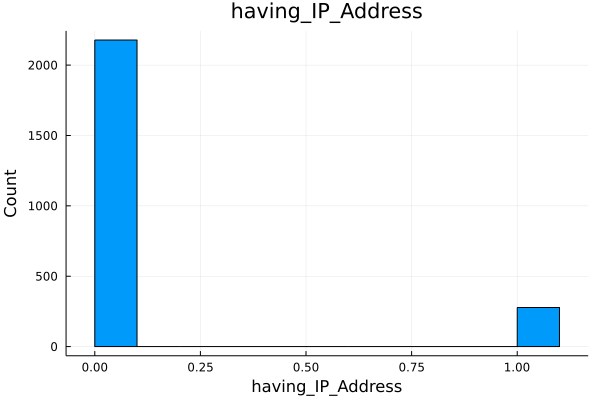

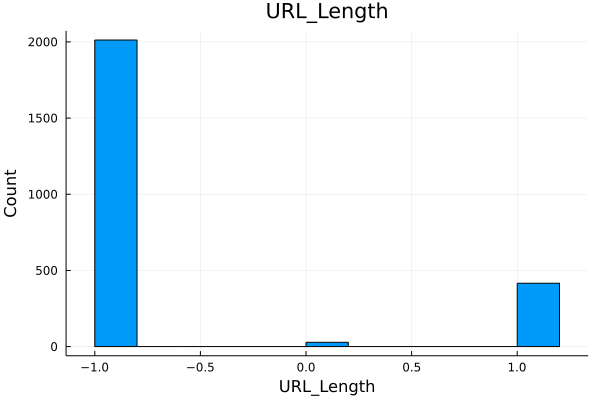

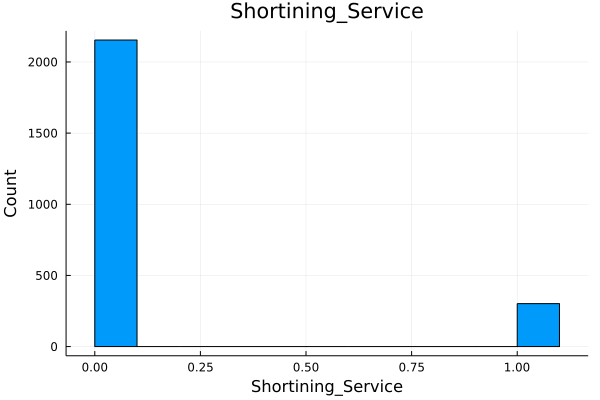

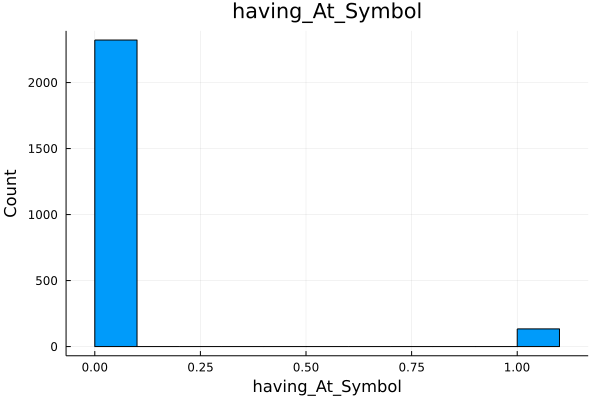

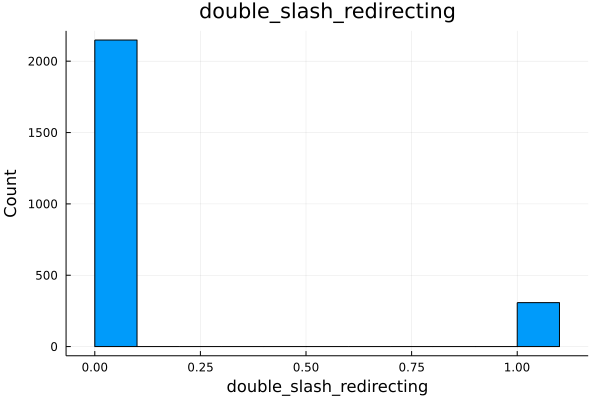

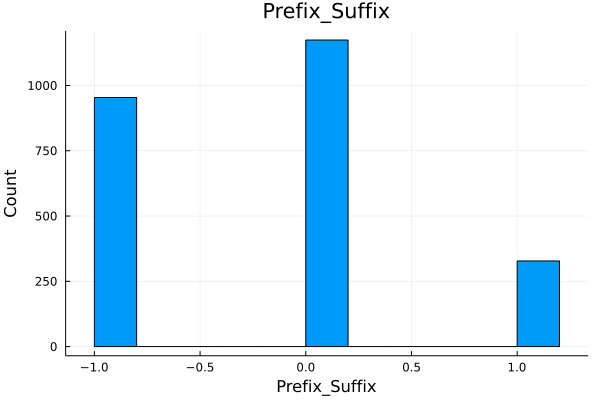

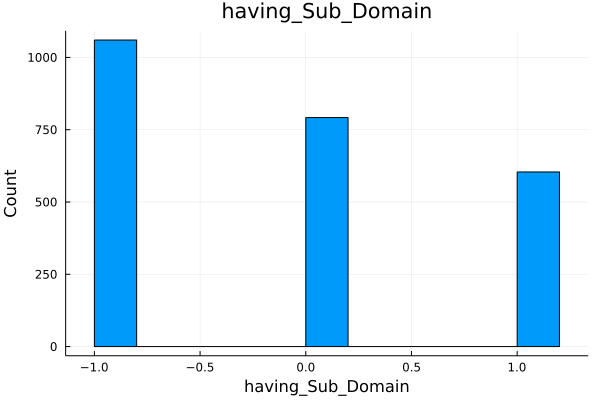

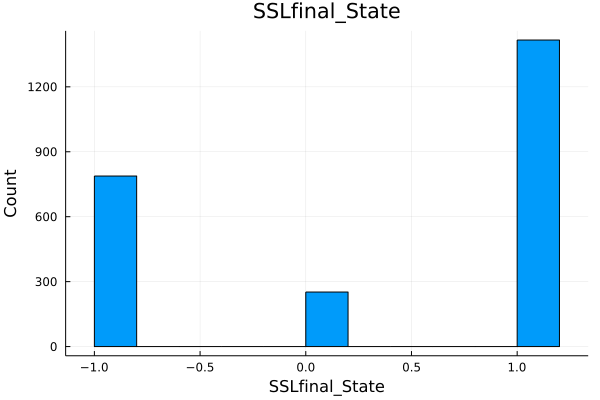

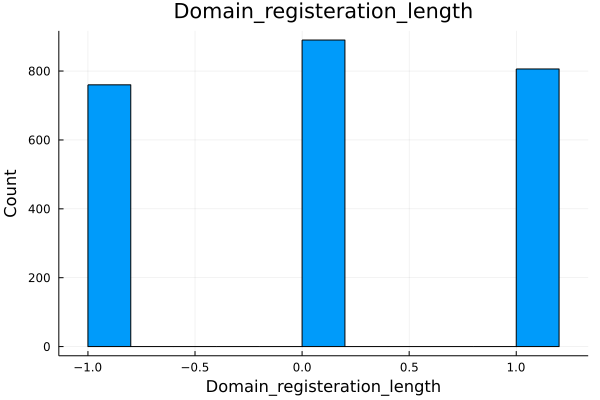

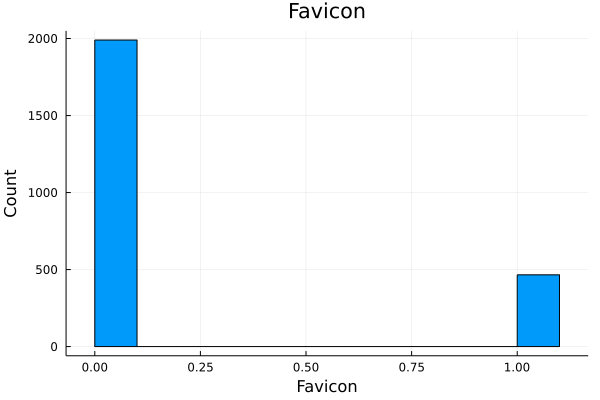

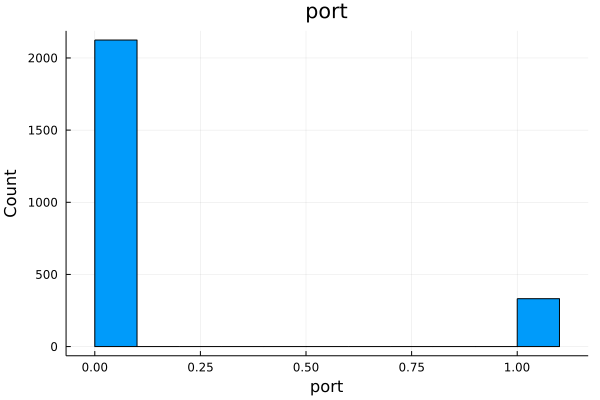

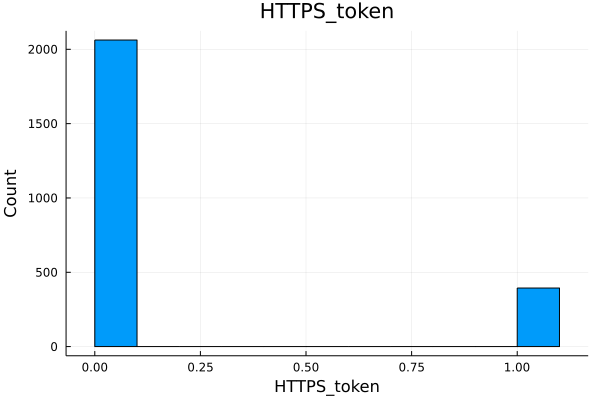

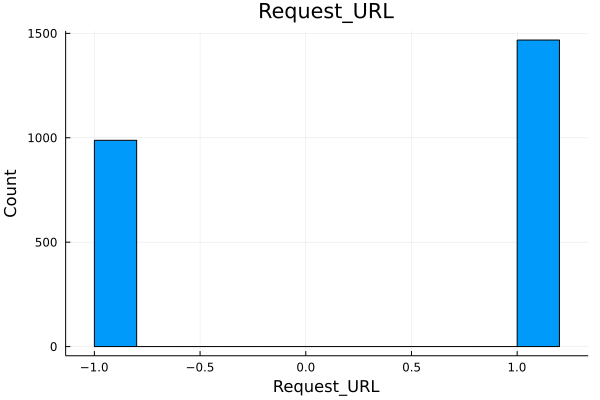

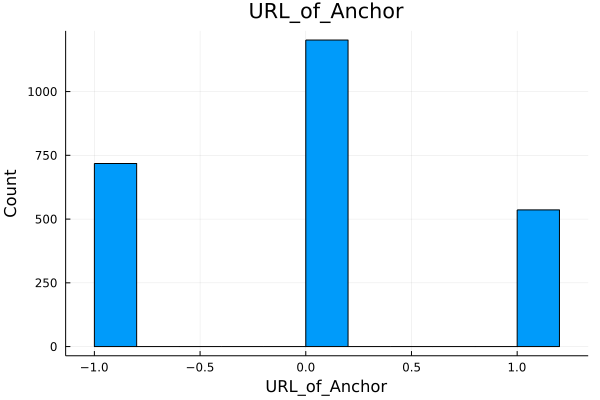

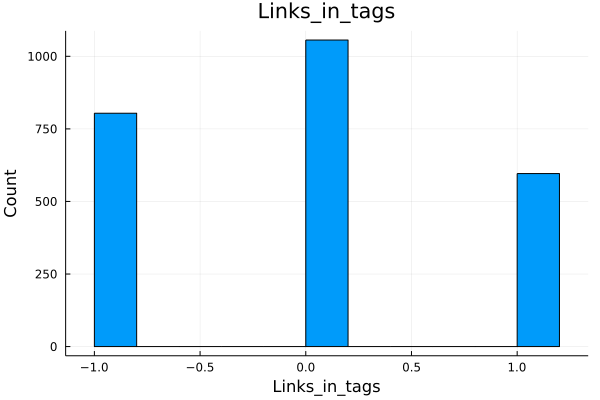

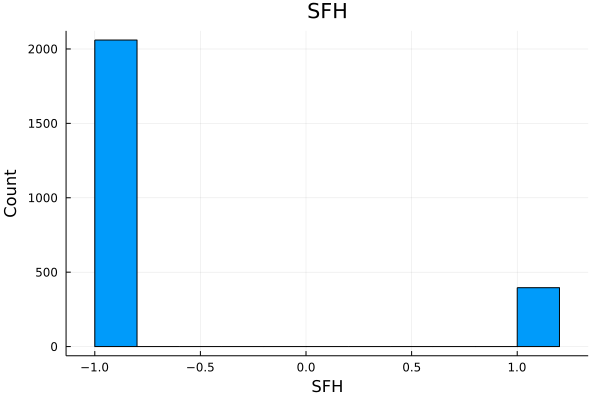

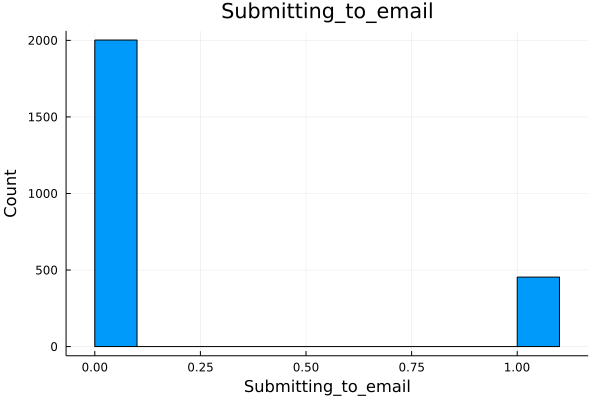

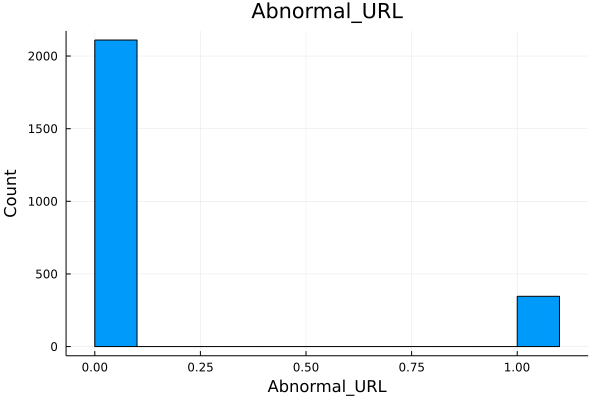

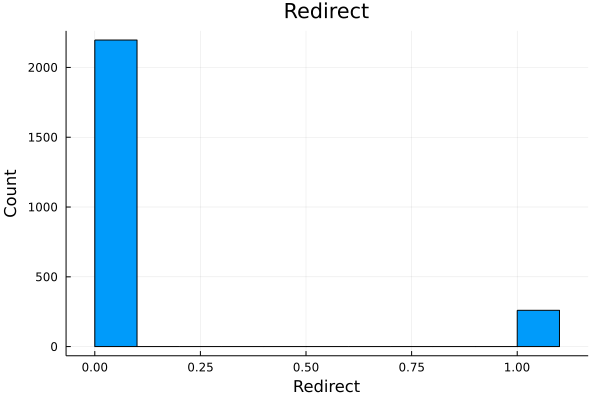

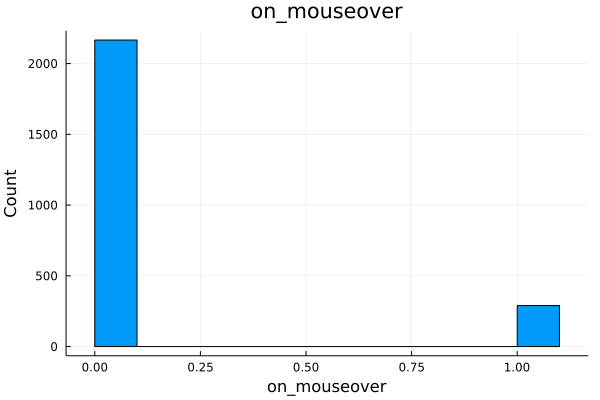

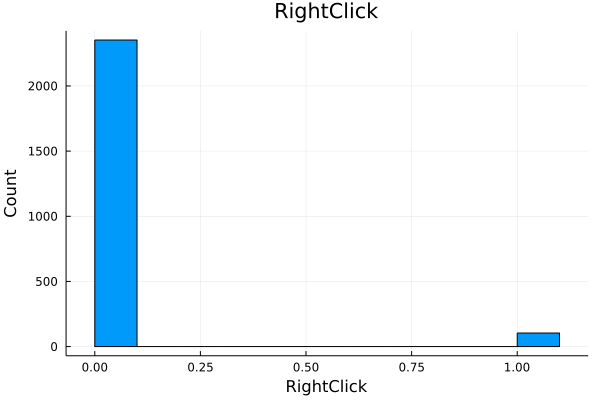

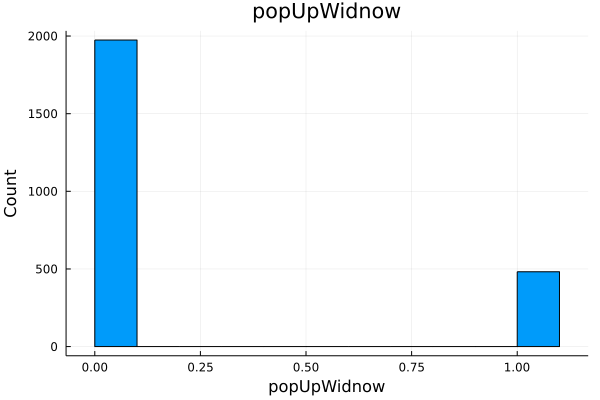

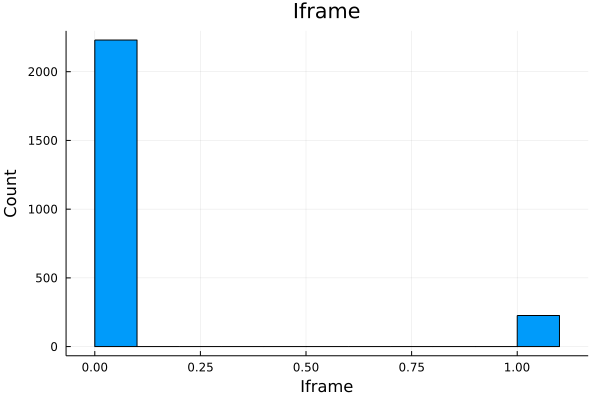

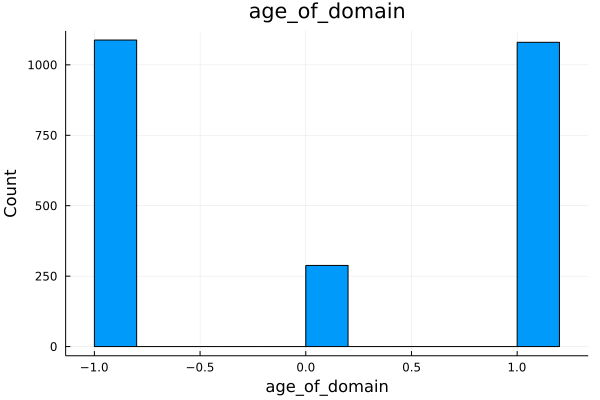

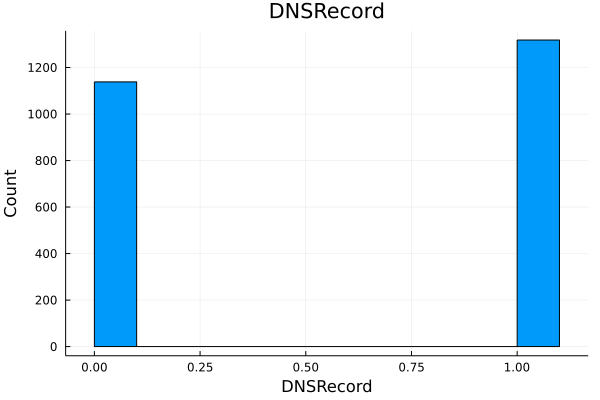

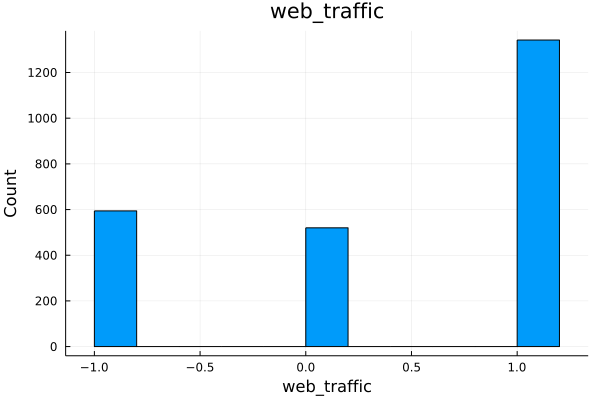

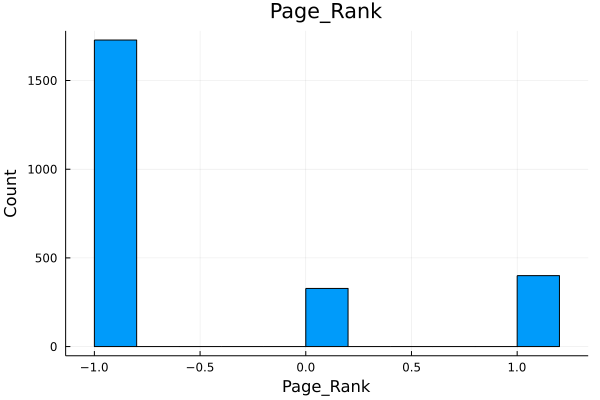

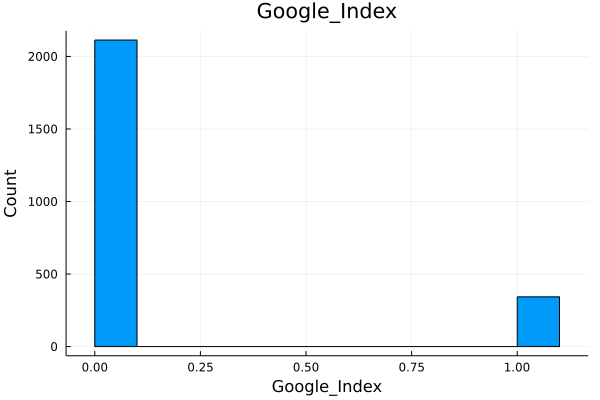

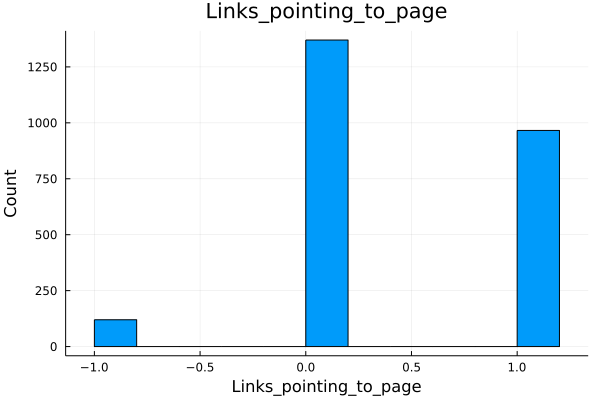

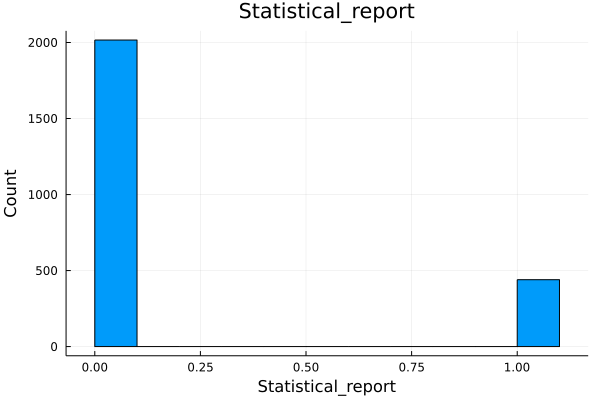

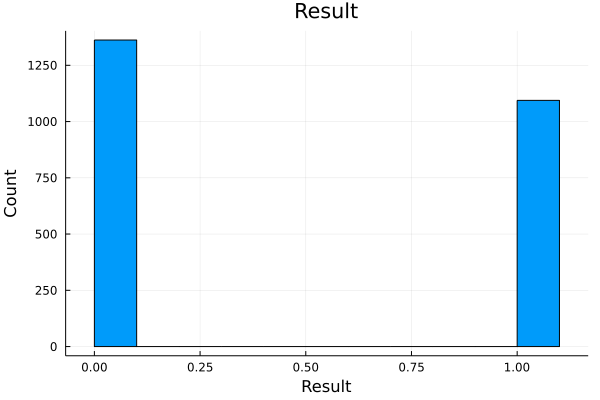

In [7]:
#plot(Plots.histogram.(eachcol(dataf))...)
#Plotting Histogram For Checking Data Distribution
for col in cols
    display(plot(
    Plots.histogram(dataf[!,col], bins = 10, title = col,legend=:none),
    xlabel = col, ylabel = "Count"  ))
end


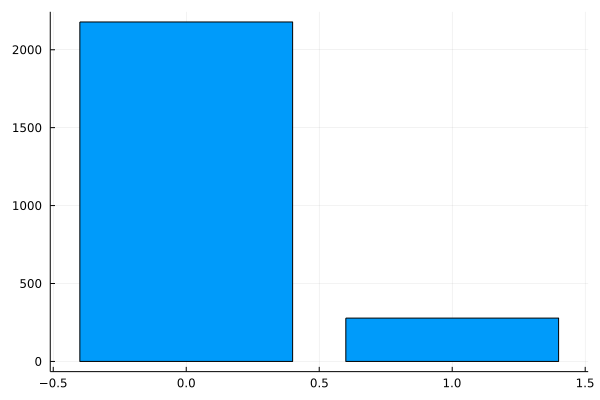

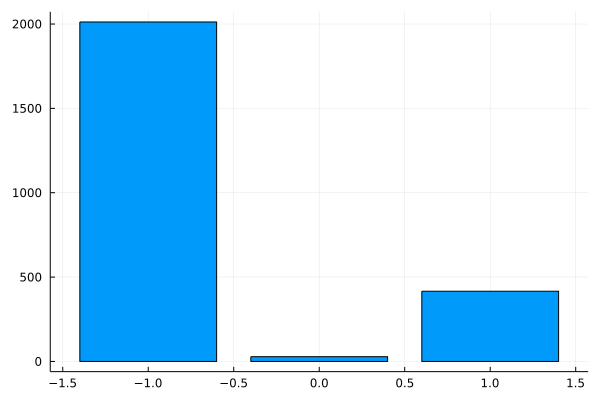

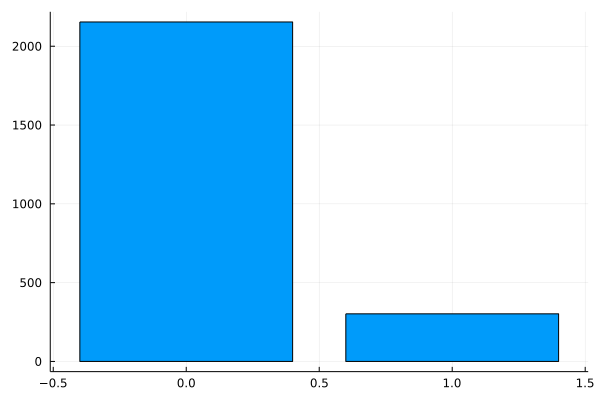

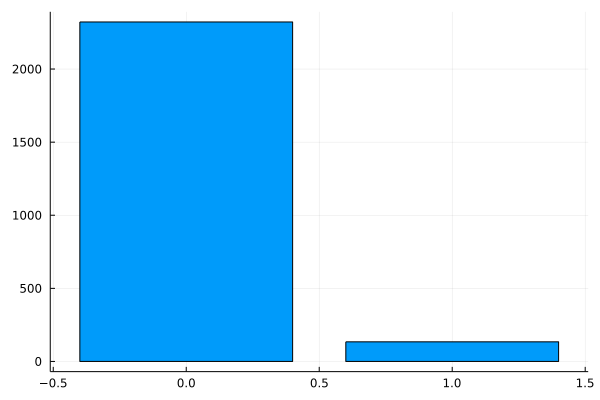

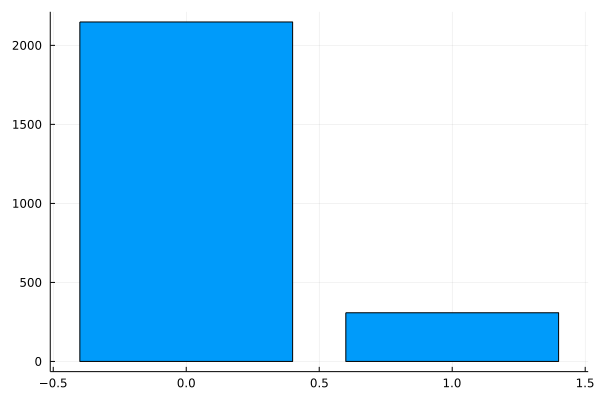

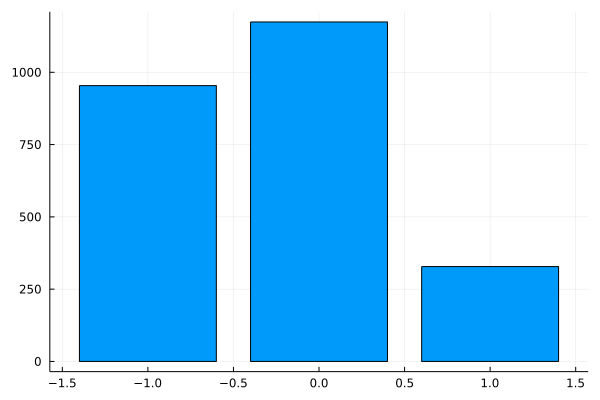

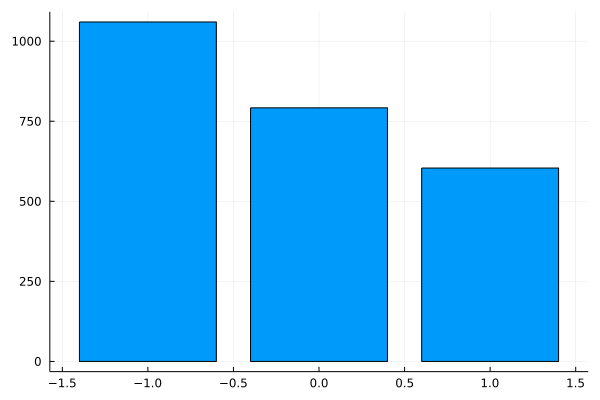

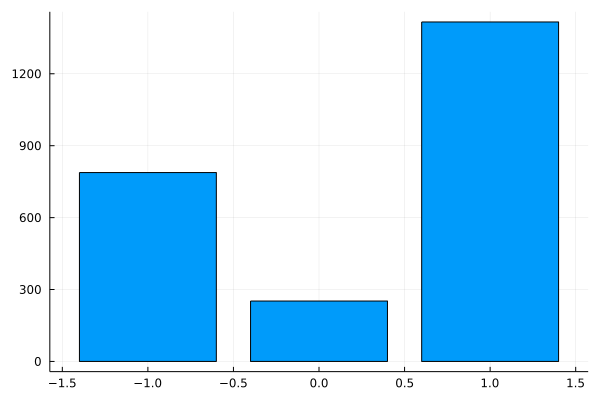

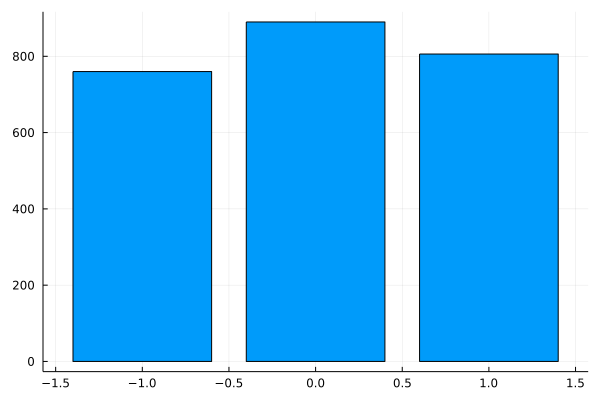

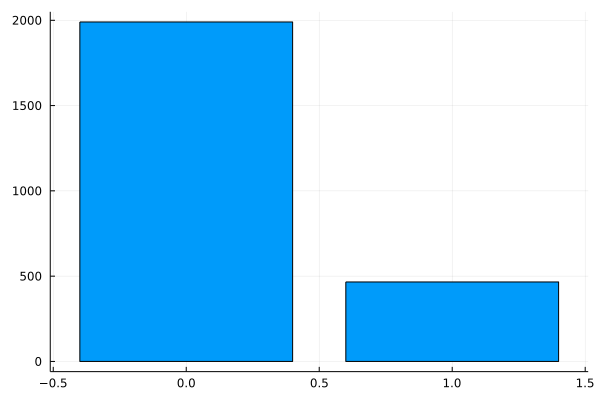

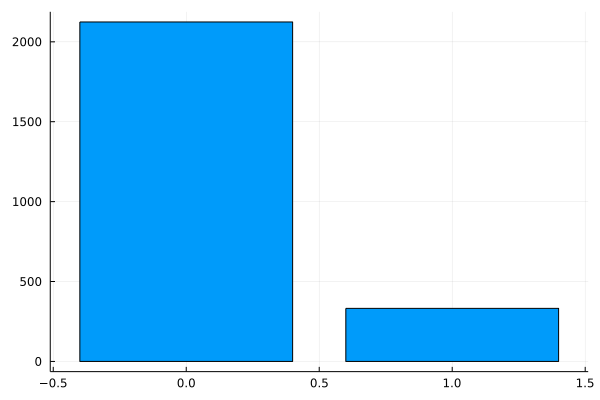

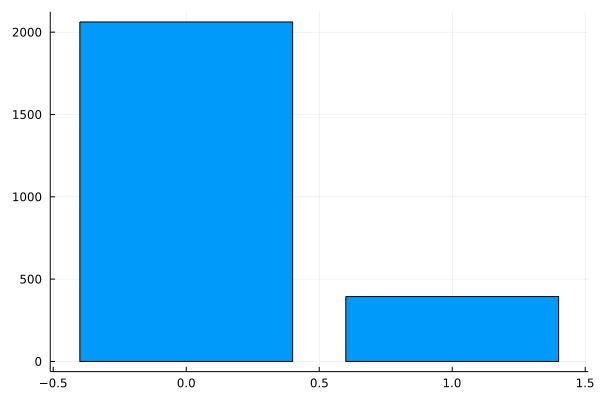

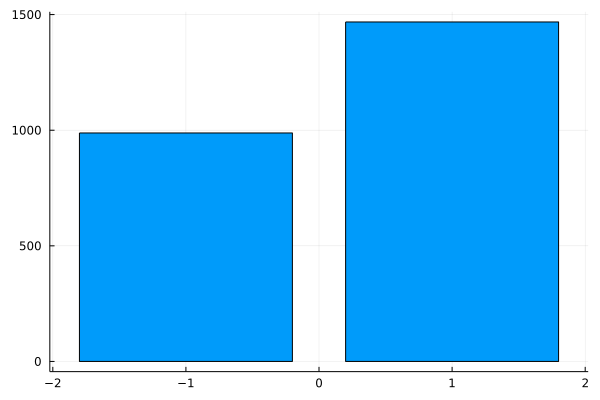

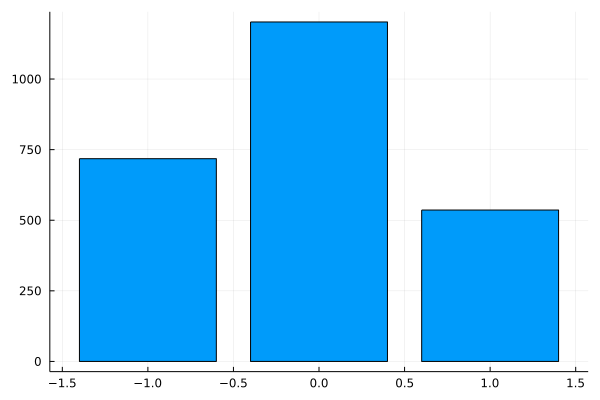

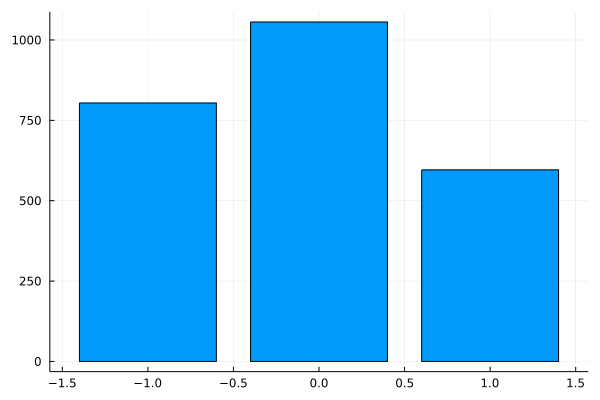

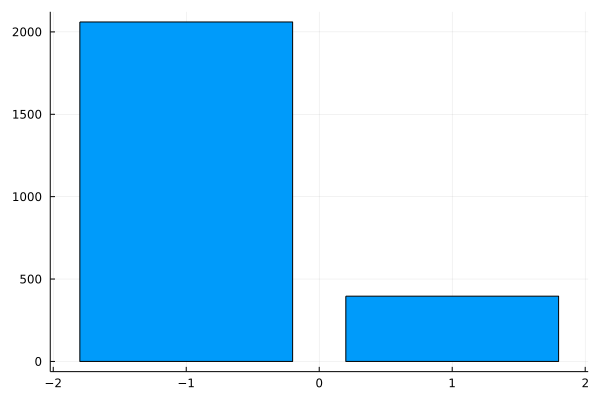

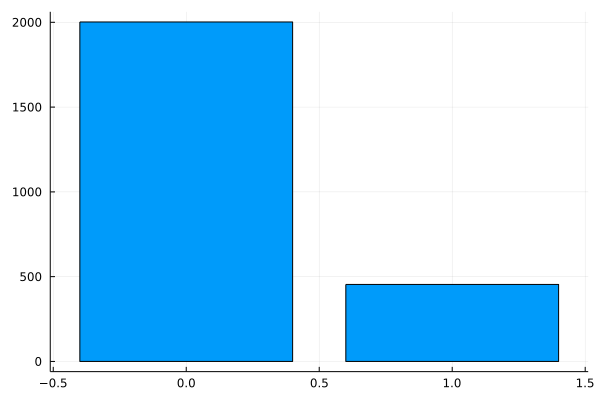

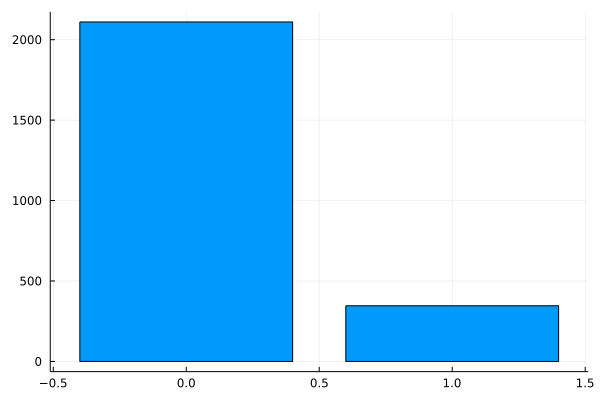

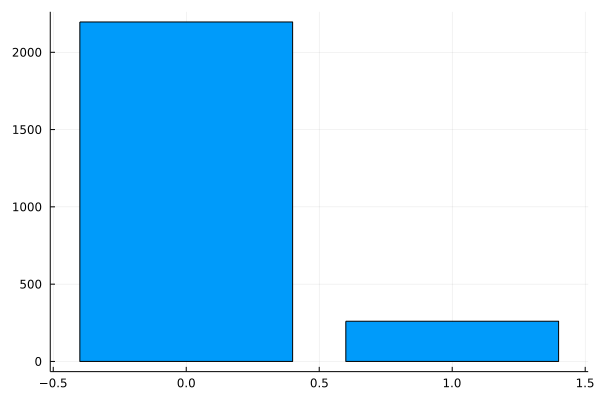

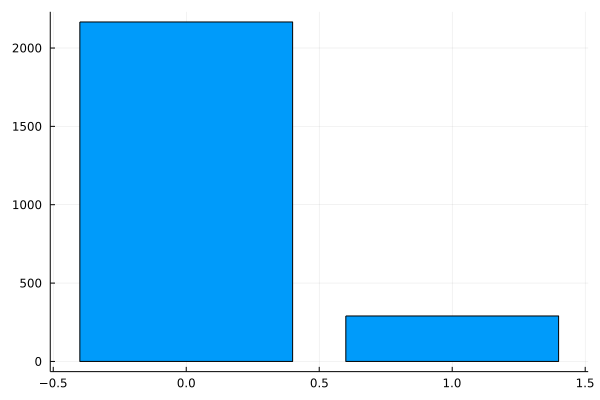

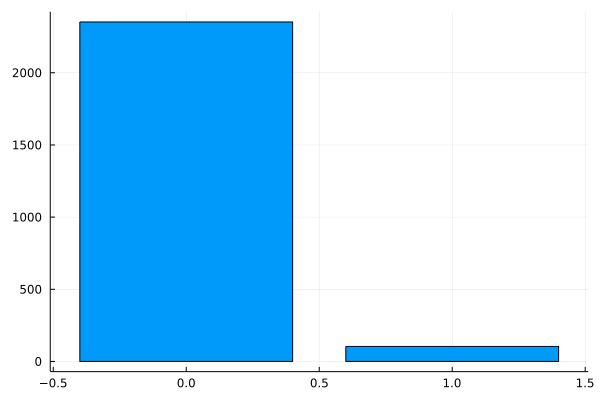

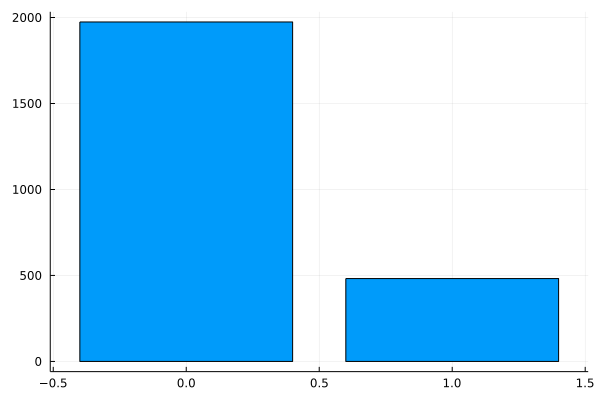

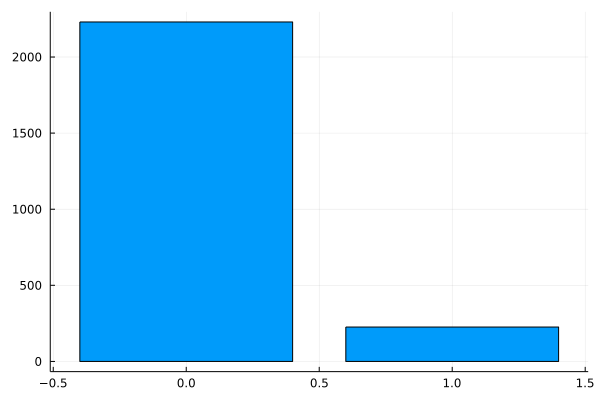

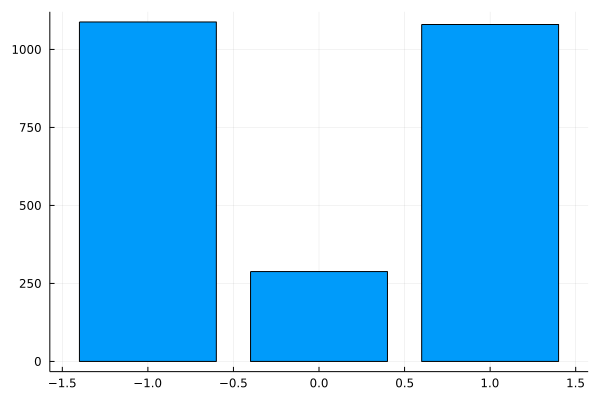

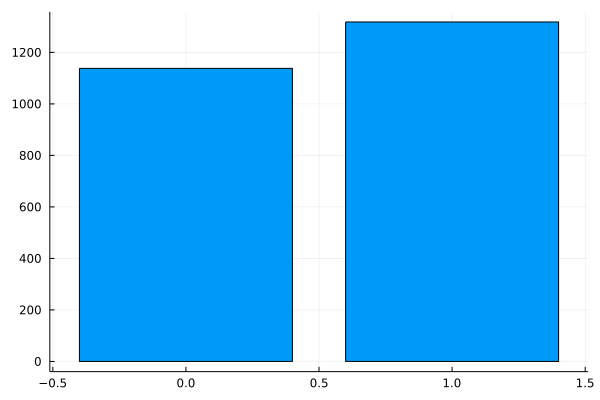

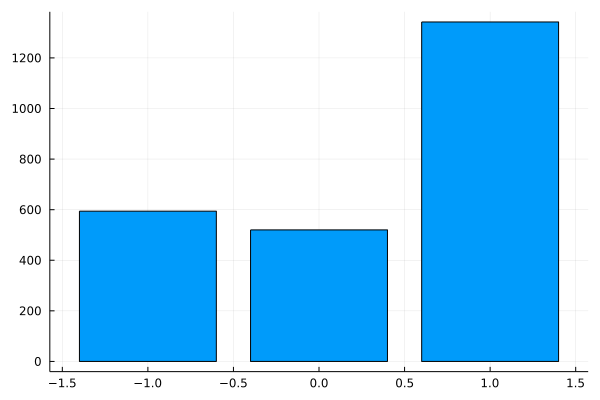

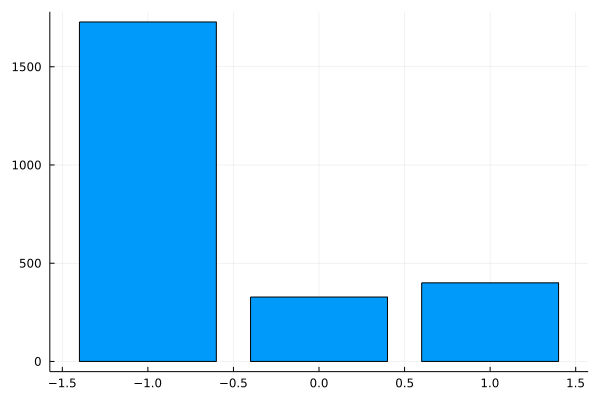

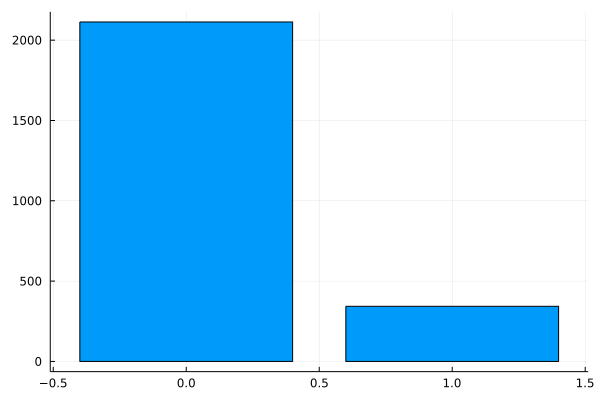

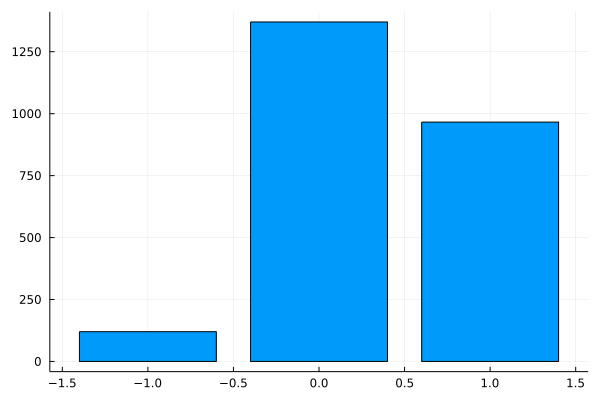

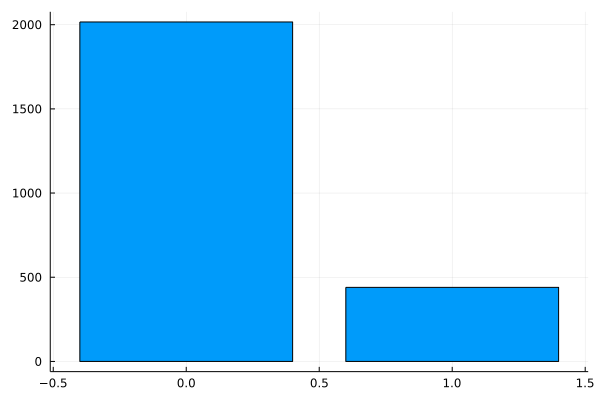

In [8]:

for i in 1:length(cols)-1
    tempdf = combine(groupby(dataf,cols[i]),nrow => cols[end])
    display(Plots.bar(tempdf[:,cols[i]],tempdf[:,cols[end]], legend = false))
end

## 2. Feature Engineering

### Checking if our data is unbalanced or not

Here, According to the **code** below and **Bar chart**, it is clear that our **"Result"** column, which is our output column, is **not unbalanced**. As it does not have drastic difference in Result column's labels (0 & 1).

In [9]:
counter(dataf[!,end])

Accumulator{Int64, Int64} with 2 entries:
  0 => 1362
  1 => 1094

### Handing Missing Value
* Here, there is no need to handle missing value because it does not have any missing value.

#### Feature Scaling & Transformation
* Here, There is no need to Scale or Transform Data because entire Data lies between -1 to 1.

In [10]:
X = dataf[!,cols[1:end-1]];
y = dataf[!,end];

In [11]:
first(X,10)

10×30 DataFrame
 Row │ having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  do ⋯
     │ Int64              Int64       Int64               Int64             In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │                 1           1                   0                 0     ⋯
   2 │                 0           1                   0                 0
   3 │                 0           0                   0                 0
   4 │                 0           0                   0                 0
   5 │                 0           0                   1                 0     ⋯
   6 │                 1           0                   1                 0
   7 │                 0          -1                   0                 0
   8 │                 0          -1                   0                 0
   9 │                 0           0                   0                 0     ⋯
  10 │                 0           0                   0                 0
                                                              26 columns omitted

In [12]:
first(y,10)

10-element Vector{Int64}:
 1
 1
 1
 1
 0
 0
 0
 0
 0
 1

In [13]:
X_mat = Matrix(X);

## 3. Feature Selection

Using **"ExtraTreeClassifier"** for Feature Selection.

In [15]:
using PyCall
@pyimport sklearn
@pyimport sklearn.ensemble as sken
ExtraTreesClassifier = sken.ExtraTreesClassifier

PyObject <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>

In [16]:
model = ExtraTreesClassifier()
model.fit(X_mat,y)

PyObject ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.002606246057107303, 0.005587050003950428, 0.002241504086896202, 0.0016203572532852947, 0.0021983105082482193, 0.1196433932809971, 0.05189060892242317, 0.25148647779174915, 0.026018507764689024, 0.005314462535636954, 0.0029779771634803726, 0.004996419677278598, 0.022505726037800385, 0.19122764016413246, 0.029299389192760966, 0.005217844226743659, 0.004224734508689079, 0.002692133442706697, 0.0017768303907387032, 0.003208018841991249, 0.0014812067051511832, 0.0052519390749050055, 0.003208306588375227, 0.041982079396501996, 0.015458238761216369, 0.12581510686803904, 0.03941727310646194, 0.01213824861498793, 0.015812904658896274, 0.002701064374160059]

In [18]:
dataf3 = DataFrame(:index=>names(X),:feature_importances_=>model.feature_importances_ )


30×2 DataFrame
 Row │ index                        feature_importances_ 
     │ String                       Float64              
─────┼───────────────────────────────────────────────────
   1 │ having_IP_Address                      0.00260625
   2 │ URL_Length                             0.00558705
   3 │ Shortining_Service                     0.0022415
   4 │ having_At_Symbol                       0.00162036
   5 │ double_slash_redirecting               0.00219831
   6 │ Prefix_Suffix                          0.119643
   7 │ having_Sub_Domain                      0.0518906
   8 │ SSLfinal_State                         0.251486
  ⋮  │              ⋮                        ⋮
  24 │ age_of_domain                          0.0419821
  25 │ DNSRecord                              0.0154582
  26 │ web_traffic                            0.125815
  27 │ Page_Rank                              0.0394173
  28 │ Google_Index                           0.0121382
  29 │ Links_pointing_to_page                 0.0158129
  30 │ Statistical_report                     0.00270106
                                          15 rows omitted

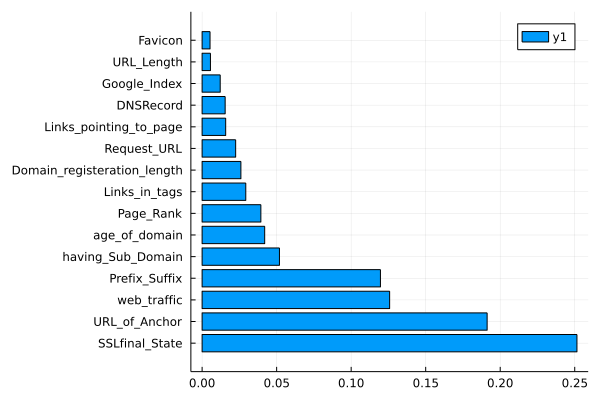

In [19]:
sort!(dataf3, [:feature_importances_])
dataftemp = dataf3[end-14:end,:]
y_label = dataftemp[!,:index];
Plots.bar(dataftemp[!,:feature_importances_],orientation=:h,yticks = (1:15,y_label),yflip=true)

Here Columns like **'Prefix_Suffix'**, **'web_traffic'**, **'URL_of_Anchor'** and **'SSLfinal_State'** are more important for our outcome. Hence, We are taking these 4 Columns.

In [20]:
X_sel = X[!,[:Prefix_Suffix,:web_traffic,:URL_of_Anchor,:SSLfinal_State]]
first(X_sel,5)

5×4 DataFrame
 Row │ Prefix_Suffix  web_traffic  URL_of_Anchor  SSLfinal_State 
     │ Int64          Int64        Int64          Int64          
─────┼───────────────────────────────────────────────────────────
   1 │            -1           -1             -1              -1
   2 │            -1            0              0               1
   3 │            -1            1              0              -1
   4 │            -1            1              0              -1
   5 │            -1            0              0               1

## Model Selection & Creation

### 1. RandomForestClassifier:

In [22]:
@pyimport sklearn.model_selection as model_sel;
cross_val_score = model_sel.cross_val_score;

@pyimport sklearn.ensemble as sken;
RandomForestClassifier = sken.RandomForestClassifier;

In [23]:
RFC_classifier = RandomForestClassifier();

#### Applying Cross-Validation

In [25]:
X_sel_mat = Matrix(X_sel);
Accuracy = cross_val_score(RFC_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
display(Accuracy);
using Statistics
println("\n AVG. Accuracy for RandomForestClassifier is: ",mean(Accuracy)*100)

10-element Vector{Float64}:
 0.9227642276422764
 0.926829268292683
 0.9186991869918699
 0.943089430894309
 0.9471544715447154
 0.9186991869918699
 0.9346938775510204
 0.963265306122449
 0.9591836734693877
 0.9306122448979591


 AVG. Accuracy for RandomForestClassifier is: 93.64990874398542


In [26]:
#from sklearn.model_selection import train_test_split
@pyimport sklearn.model_selection as skmn
train_test_split = skmn.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel_mat, y, test_size=0.25, random_state=42)

4-element Vector{Array{Int64}}:
 [0 1 0 1; 0 0 -1 -1; … ; -1 0 1 1; -1 -1 -1 -1]
 [0 1 1 1; 0 0 0 1; … ; 0 1 1 1; -1 1 0 -1]
 [0, 1, 1, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
 [0, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 1, 1, 0, 1, 1, 0, 0, 0, 1]

In [27]:
# Fitting the Model
RFC_classifier.fit(X_train,y_train)

# Predicting from X_test
y_pred = RFC_classifier.predict(X_test);


# Calculating Confusion Matrix
#from sklearn.metrics import confusion_matrix
@pyimport sklearn.metrics as skme
confusion_matrix = skme.confusion_matrix



In [28]:
cm = confusion_matrix(y_test, y_pred)
display(cm)
accuracy_score = skme.accuracy_score
score = accuracy_score(y_pred,y_test)
display(score)


2×2 Matrix{Int64}:
 316   31
  10  257

0.9332247557003257

### 3.KNN

In [29]:
@pyimport sklearn.neighbors as skne
KNeighborsClassifier = skne.KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()

PyObject KNeighborsClassifier()

#### Applying Cross-Validation

In [30]:
Accuracy = cross_val_score(KNN_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
print(Accuracy)
print("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9146341463414634, 0.9227642276422764, 0.9146341463414634, 0.9308943089430894, 0.9471544715447154, 0.9186991869918699, 0.9224489795918367, 0.9346938775510204, 0.9591836734693877, 0.9224489795918367]
 AVG. Accuracy for KNN is: 92.87555998008958

In [31]:
# Model
KNN_classifier.fit(X_train,y_train);
y_pred = KNN_classifier.predict(X_test);

# Calculating Confusion Matrix
@pyimport sklearn.metrics as skme
cm = skme.confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=skme.accuracy_score(y_pred,y_test)
println(score)


[328 19; 32 235]
0.9169381107491856


### 4. SVM:

In [32]:
@pyimport sklearn as sk
svm = sk.svm;
SVC_classifier = svm.SVC()

PyObject SVC()

#### Applying Cross-Validation

In [33]:
Accuracy = cross_val_score(SVC_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
print(Accuracy)
print("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9227642276422764, 0.926829268292683, 0.9146341463414634, 0.943089430894309, 0.9471544715447154, 0.9186991869918699, 0.9306122448979591, 0.963265306122449, 0.9591836734693877, 0.9306122448979591]
 AVG. Accuracy for KNN is: 

93.56844201095072

In [34]:
# Model
SVC_classifier.fit(X_train,y_train)
y_pred = SVC_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
println(cm)
score=accuracy_score(y_pred,y_test)
println(score)

[314 33; 10 257]
0.9299674267100977


### 5. LogisticRegression:

In [35]:
@pyimport sklearn.linear_model as skln
LR_classifier = skln.LogisticRegression()

PyObject LogisticRegression()

#### Applying Cross-Validation

In [36]:
Accuracy = cross_val_score(LR_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
println(Accuracy)
println("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9186991869918699, 0.926829268292683, 0.9146341463414634, 0.9349593495934959, 0.943089430894309, 0.9186991869918699, 0.9346938775510204, 0.9510204081632653, 0.9551020408163265, 0.926530612244898]

 AVG. Accuracy for KNN is: 93.24257507881202


In [37]:
# Model
LR_classifier.fit(X_train,y_train)
y_pred = LR_classifier.predict(X_test)

# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)


[325 22; 14 253]
0.9413680781758957


### 6. Naive Bays:

In [38]:
@pyimport sklearn.naive_bayes as sknb

NB_classifier = sknb.GaussianNB();

#### Applying Cross-Validation

In [39]:
Accuracy = cross_val_score(LR_classifier, X_sel_mat, y, scoring="accuracy", cv = 10)
println(Accuracy)
println("\n AVG. Accuracy for KNN is: ",mean(Accuracy)*100)

[0.9186991869918699, 0.926829268292683, 0.9146341463414634, 0.9349593495934959, 0.943089430894309, 0.9186991869918699, 0.9346938775510204, 0.9510204081632653, 0.9551020408163265, 0.926530612244898]

 AVG. Accuracy for KNN is: 93.24257507881202


In [40]:
# Model
NB_classifier.fit(X_train,y_train)
y_pred = NB_classifier.predict(X_test)


# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)

[326 21; 32 235]
0.9136807817589576


### 7. ANN

In [41]:
@pyimport keras as ke
@pyimport keras.models as kemo
Sequential = kemo.Sequential
@pyimport keras.layers as kela
Dense = kela.Dense
LeakyReLU = kela.LeakyReLU
PReLU = kela.LeakyReLU
ELU = kela.ELU
Dropout = kela.Dropout;


PyObject <class 'keras.layers.regularization.dropout.Dropout'>

In [42]:
# Initialising the ANN
ANN_classifier = Sequential()
# Adding the input layer and the first hidden layer
# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
ANN_classifier.add(Dense( 12, kernel_initializer = "he_uniform",activation="relu",input_dim = 4))
ANN_classifier.add(Dropout(0.4))

# Adding the second hidden layer
ANN_classifier.add(Dense( 8, kernel_initializer = "he_uniform",activation="relu"))
ANN_classifier.add(Dropout(0.5))

#Adding Third Layer
ANN_classifier.add(Dense( 3, kernel_initializer = "he_uniform",activation="relu"))
ANN_classifier.add(Dropout(0.2))

# Adding the output layer
ANN_classifier.add(Dense( 1, kernel_initializer =  "he_uniform", activation = "sigmoid"))

# Compiling the ANN
ANN_classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Fitting the ANN to the Training set
model_history=ANN_classifier.fit(X_train, y_train,verbose = 2,validation_split=0.30,batch_size = 30, workers = 8,use_multiprocessing=true, epochs = 150)

Epoch 1/150
43/43 - 2s - loss: 1.0118 - accuracy: 0.4546 - val_loss: 0.6398 - val_accuracy: 0.5335 - 2s/epoch - 35ms/step
Epoch 2/150
43/43 - 0s - loss: 0.8093 - accuracy: 0.5384 - val_loss: 0.6090 - val_accuracy: 0.5986 - 265ms/epoch - 6ms/step
Epoch 3/150
43/43 - 0s - loss: 0.7783 - accuracy: 0.5694 - val_loss: 0.6126 - val_accuracy: 0.6040 - 263ms/epoch - 6ms/step
Epoch 4/150
43/43 - 0s - loss: 0.7217 - accuracy: 0.5772 - val_loss: 0.6067 - val_accuracy: 0.6293 - 254ms/epoch - 6ms/step
Epoch 5/150
43/43 - 0s - loss: 0.6679 - accuracy: 0.6152 - val_loss: 0.5805 - val_accuracy: 0.7866 - 268ms/epoch - 6ms/step
Epoch 6/150
43/43 - 0s - loss: 0.6455 - accuracy: 0.6299 - val_loss: 0.5489 - val_accuracy: 0.7595 - 264ms/epoch - 6ms/step
Epoch 7/150
43/43 - 0s - loss: 0.6262 - accuracy: 0.6214 - val_loss: 0.5195 - val_accuracy: 0.7866 - 265ms/epoch - 6ms/step
Epoch 8/150
43/43 - 0s - loss: 0.6006 - accuracy: 0.6455 - val_loss: 0.4815 - val_accuracy: 0.8065 - 264ms/epoch - 6ms/step
Epoch 9/15

2022-08-20 15:52:58.075976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-20 15:52:58.530214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3967 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


PyObject <keras.callbacks.History object at 0x00000000A47EA880>

In [45]:
length(y_train)

1842

In [46]:
model_history.history

Dict{Any, Any} with 4 entries:
  "val_accuracy" => [0.533454, 0.598553, 0.603978, 0.629295, 0.786618, 0.759494…
  "accuracy"     => [0.454616, 0.538402, 0.569434, 0.577192, 0.615206, 0.629946…
  "loss"         => [1.01182, 0.809295, 0.778323, 0.721729, 0.667923, 0.645474,…
  "val_loss"     => [0.639845, 0.608951, 0.612613, 0.606701, 0.58054, 0.54889, …

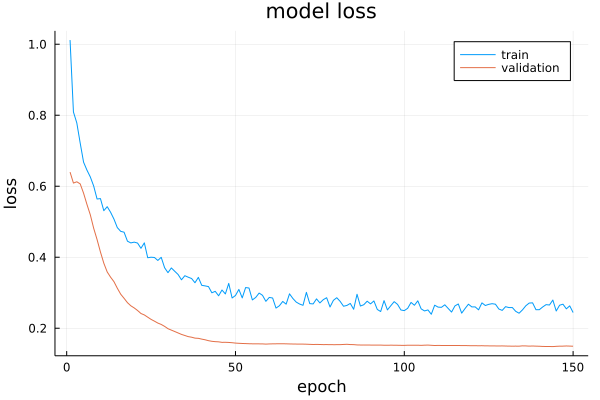

In [61]:

plot([model_history.history["loss"],model_history.history["val_loss"]],title = "model loss",
xlabel = "epoch",ylabel = "loss",label =  ["train" "validation"],loc="upper left"
)

In [74]:
y_pred = ANN_classifier.predict(X_test);
y_pred = (y_pred.> 0.5);



20/20 [==============================] - 0s 3ms/step


In [73]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
println(cm)

# Calculate the Accuracy
score=accuracy_score(y_pred,y_test)
println(score)

[314 33; 11 256]
0.9283387622149837